NON-SEPARABLE CLASSIFICATION – MULTI-FONT CHARACTER RECOGNITION 

using Support Vector Machine (SVM) modeling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io
from bayes_opt import BayesianOptimization
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Importing more required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings

#makes numby printouts easier to read
np.set_printoptions(precision=3, suppress=True)

Alphabet training and testing datasets are imported.

In [4]:


dir = ("C:\\Users\\mapet\\Documents\\WayneState_classes\\IE7860_IntelligentAnalytics\\MLPassignment_MP\\")
loc_train = (dir + "Alphabet_training.txt")
loc_test = (dir + "Alphabet_testing.txt")

Data is reformatted into input/output train/test arrays

In [5]:
f = open(loc_train, "r")
string = f.read()
array = np.fromstring(string, dtype=int, sep='\n')
split_array = np.array_split(array, 78)

Inputs have 14 features

In [6]:
input_array = [item[0:14] for item in split_array]
input_array = np.array(input_array)
input_array[0].shape

(14,)

Outputs have 26 classes, for all 26 letters in alphabet.

In [7]:
output_array = [item[14:] for item in split_array]
output_array = np.array(output_array)
output_array[0].shape

(26,)

Reformatting output into one categorical class column

In [44]:
from string import ascii_lowercase
import string
letters = list(string.ascii_lowercase)
letters

class_array = []   
for x in range(len(output_array)):
    for i in range(26):
        if output_array[x][i] == 1:
            #print(letters[i])
            class_array.append(letters[i])

class_array[7] , output_array[7]

('c',
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]))

In [38]:
f = open(loc_test, "r")
string = f.read()
array = np.fromstring(string, dtype=int, sep='\n')
split_array = np.array_split(array, 78)

In [39]:
input_test_array = [item[0:14] for item in split_array]
input_test_array = np.array(input_array)

In [40]:
output_test_array = [item[14:] for item in split_array]
output_test_array = np.array(output_test_array)

In [45]:
#reformat output

class_test_array = []   
for x in range(len(output_test_array)):
    for i in range(26):
        if output_test_array[x][i] == 1:
            #print(letters[i])
            class_test_array.append(letters[i])

class_test_array[7] , output_array[7]

('c',
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]))

Both the test and train data have a uniform distribution of classes. There are three of each letter in each letterset.

In [49]:
print('Class distribution in training data')
pd.Categorical(class_array).describe()

Class distribution in training data


,counts,freqs
categories,,
a,3,0.038462
b,3,0.038462
c,3,0.038462
d,3,0.038462
e,3,0.038462
f,3,0.038462
g,3,0.038462
h,3,0.038462
i,3,0.038462


Next SVM model is defined.

In [50]:
# call SVM params
import sklearn 
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear', C=1) #linear, with c param as 1

Fit SVM model to training data

In [51]:
model.fit(input_array , class_array)

SVC(C=1, kernel='linear')

Using the model on the test data, predictions are made and used to calculate accuracy.

In [56]:
from sklearn.metrics import accuracy_score
predictions = model.predict(input_test_array)
accuracy = accuracy_score(class_test_array, predictions)
print("Percent accuracy : " , "{:.0%}".format(accuracy))

Percent accuracy :  100%


Text(91.68, 0.5, 'predicted label')

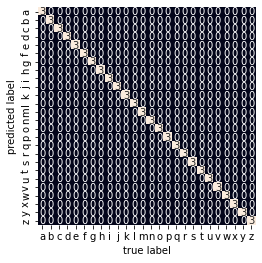

In [55]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(class_test_array, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=letters,
            yticklabels=letters)
plt.xlabel('true label')
plt.ylabel('predicted label')

Trained on three different fonts (Courier, New York, Chicago fonts) and tested on three other different fonts (Geneva, Times, Venice fonts) , the model has 100% accuracy